<a href="https://colab.research.google.com/github/bmybest/NEXTGEN-AI-CAMP/blob/main/Nextgen_AI_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [ ]:
# Check for CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
### START CODE HERE ###
square = [[[1,1,1,1],
          [1,5,5,1],
          [1,5,5,1],
          [1,1,1,1]]]
triangle = [[[1,1,1,5],
            [1,1,5,5],
            [1,5,5,5],
            [5,5,5,5]]]

tensor_square = torch.tensor(square)
tensor_triangle = torch.tensor(triangle)

labels_square = torch.tensor([1])
labels_triangle = torch.tensor([0])

data_tensors = torch.stack([tensor_square, tensor_triangle])
data_labels = torch.stack([labels_square, labels_triangle])

### END CODE HERE ###

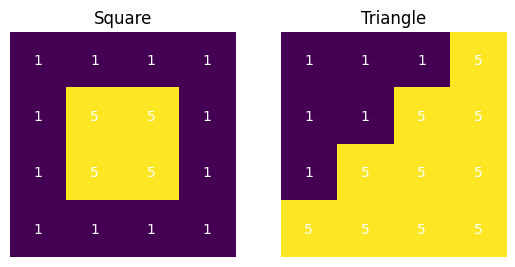

In [ ]:
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(tensor_square[0])
plt.title('Square')
for i in range(tensor_square.shape[1]):
    for j in range(tensor_square.shape[2]):
        plt.text(j, i, tensor_square[0, i, j].item(), ha='center', va='center', color='white')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(tensor_triangle[0])
plt.title('Triangle')
for i in range(tensor_triangle.shape[1]):
    for j in range(tensor_triangle.shape[2]):
        plt.text(j, i, tensor_triangle[0, i, j].item(), ha='center', va='center', color='white')

plt.show()

In [ ]:
assert data_tensors.shape == torch.Size([2, 1, 4, 4])
assert data_labels.shape == torch.Size([2, 1])
print("You have successfully created the data_tensors!")

You have successfully created the data_tensors!


In [ ]:
dataset = torch.utils.data.TensorDataset(data_tensors, data_labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=True)

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32,2)
        self.relu3 = nn.ReLU()
        self.out = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()


    def get_features(self, x):
        """
        Function to get the feature maps of the input
        """
        x = self.conv1(x)
        f1 = self.relu1(x)
        x = self.conv2(f1)
        f2 = self.relu2(x)
        return f1,f2

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = self.relu3(x)
        x = self.out(x)
        x = self.sigmoid(x)
        return x

# Set the random seed for reproducible results
torch.manual_seed(841)
model = SimpleCNN().to(device)
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=32, out_features=2, bias=True)
  (relu3): ReLU()
  (out): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
#ตรวจสอบว่ามิติตรงไหม
assert model(tensor_triangle.unsqueeze(1).float().to(device)).shape == torch.Size([1, 1])
print("You have successfully implemented a forward pass!")

You have successfully implemented a forward pass!


In [ ]:
epochs = 10000
lr = 0.0028
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_history = []
for epoch in range(epochs):
    for x,y in dataloader:
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        output = model(x.float())
        loss = criterion(output, y.float())
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
    if (epoch+1) % 100 == 0:
        print(f'[Epoch {epoch+1}] Loss: {loss.item()}')

[Epoch 100] Loss: 0.6817154884338379
[Epoch 200] Loss: 0.6611222624778748
[Epoch 300] Loss: 0.6282346248626709
[Epoch 400] Loss: 0.5672623515129089
[Epoch 500] Loss: 0.47858792543411255
[Epoch 600] Loss: 0.39856597781181335
[Epoch 700] Loss: 0.34911811351776123
[Epoch 800] Loss: 0.315512478351593
[Epoch 900] Loss: 0.28158697485923767
[Epoch 1000] Loss: 0.2267603874206543
[Epoch 1100] Loss: 0.1345243602991104
[Epoch 1200] Loss: 0.0633760541677475
[Epoch 1300] Loss: 0.03378051891922951
[Epoch 1400] Loss: 0.021148990839719772
[Epoch 1500] Loss: 0.014553532935678959
[Epoch 1600] Loss: 0.010708252899348736
[Epoch 1700] Loss: 0.008306743577122688
[Epoch 1800] Loss: 0.006662528030574322
[Epoch 1900] Loss: 0.005505356937646866
[Epoch 2000] Loss: 0.004654431249946356
[Epoch 2100] Loss: 0.003999796696007252
[Epoch 2200] Loss: 0.0034895939752459526
[Epoch 2300] Loss: 0.003082637209445238
[Epoch 2400] Loss: 0.002748720347881317
[Epoch 2500] Loss: 0.0024750535376369953
[Epoch 2600] Loss: 0.00224358

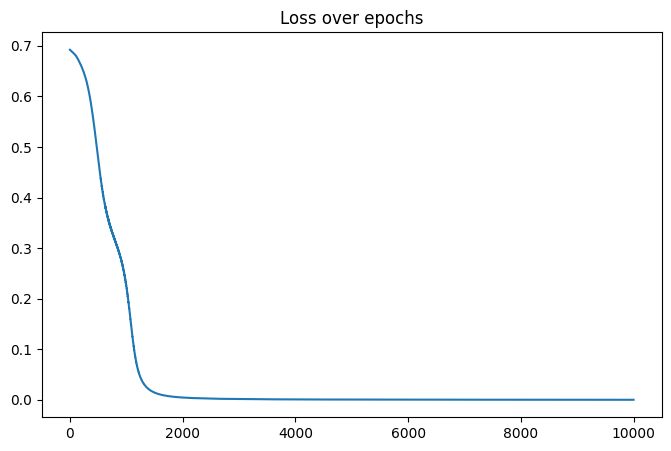

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Loss over epochs')
plt.plot(loss_history)

Save weigth model

เราสามารถใช้ torch.save() เพื่อ save model และ ใช้ model.state_dict() เพื่อเข้าถึง dictionary ของ array ของ weights (ค่าสัมประสิทธิใน kernel mask) และ bias ของแต่ละ node จะเรียงตามลำดับ layer กำกับด้วยชื่อ layer.parameter

In [ ]:
### START CODE HERE ###
torch.save(model.state_dict(), 'model.pth')
model.state_dict()
### END CODE HERE ###

OrderedDict([('conv1.weight',
              tensor([[[[ 0.4178,  0.3936,  0.0348],
                        [ 0.1918, -0.3002, -0.3480],
                        [ 0.0229, -0.1447, -0.0315]]],
              
              
                      [[[-0.1744,  0.0069,  0.2229],
                        [ 0.3050,  0.4549,  0.2327],
                        [-0.1438,  0.4869,  0.5488]]]])),
             ('conv1.bias', tensor([-0.1141,  0.1048])),
             ('conv2.weight',
              tensor([[[[ 0.1378,  0.0572, -0.3133],
                        [-0.1260, -0.0546, -0.3380],
                        [-0.1682, -0.1877, -0.0948]],
              
                       [[-0.0245,  0.2931,  0.3160],
                        [ 0.2575,  0.5127,  0.3996],
                        [-0.0087,  0.1811,  0.2367]]],
              
              
                      [[[-0.0150, -0.0864, -0.0030],
                        [-0.0923,  0.0210,  0.1223],
                        [-0.2476,  0.2070,  0.2269]],
  

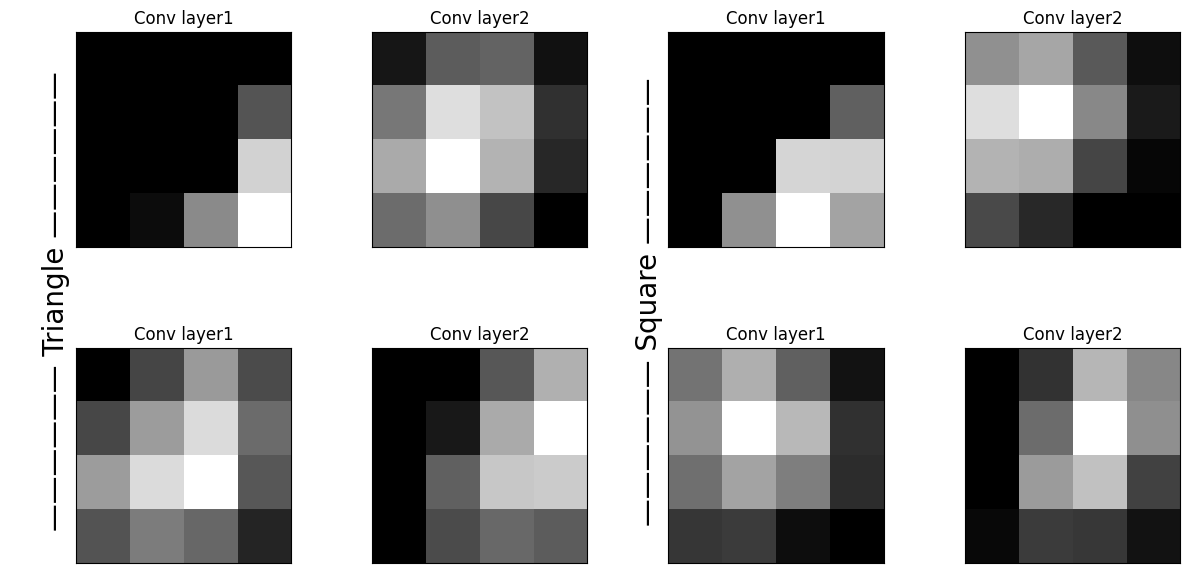

In [ ]:
conv1_triangle, conv2_triangle = model.get_features(tensor_triangle.unsqueeze(1).float().to(device))
conv1_square, conv2_square = model.get_features(tensor_square.unsqueeze(1).float().to(device))

plt.figure(figsize=(12, 6))

feature_maps = [conv1_triangle, conv2_triangle, conv1_square, conv2_square]
titles = ['Conv layer1', 'Conv layer2']

for i, feature_map in enumerate(feature_maps):

    plt.subplot(2, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_map[0, 0].squeeze().cpu().detach().numpy(), cmap='gray')
    if i == 0:
        plt.ylabel('\n—————— Triangle ——————', fontsize=20,y=-0.25)
    elif i == 2:
        plt.ylabel('\n—————— Square ——————', fontsize=20,y=-0.25)
    plt.title(titles[i%2!=0])

    plt.subplot(2, 4, i + 5)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_map[0, 1].squeeze().cpu().detach().numpy(), cmap='gray')
    plt.title(titles[i%2!=0])
plt.tight_layout()
plt.show()

In [ ]:
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

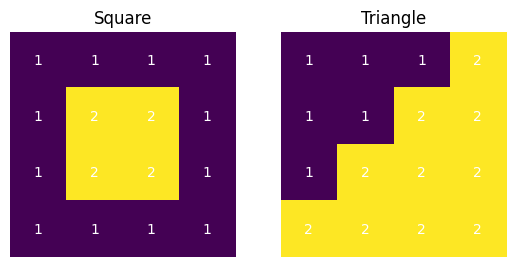

In [ ]:
square_test = [[[1,1,1,1],
          [1,2,2,1],
          [1,2,2,1],
          [1,1,1,1]]]
triangle_test = [[[1,1,1,2],
            [1,1,2,2],
            [1,2,2,2],
            [2,2,2,2]]]

tensor_square_test = torch.tensor(square_test)
tensor_triangle_test = torch.tensor(triangle_test)

labels_square_test = torch.tensor([1])
labels_triangle_test = torch.tensor([0])

test_data_tensors = torch.stack([tensor_square_test, tensor_triangle_test])
test_data_labels = torch.stack([labels_square_test, labels_triangle_test])

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(tensor_square_test[0])
plt.title('Square')
for i in range(tensor_square_test.shape[1]):
    for j in range(tensor_square_test.shape[2]):
        plt.text(j, i, tensor_square_test[0, i, j].item(), ha='center', va='center', color='white')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(tensor_triangle_test[0])
plt.title('Triangle')
for i in range(tensor_triangle_test.shape[1]):
    for j in range(tensor_triangle_test.shape[2]):
        plt.text(j, i, tensor_triangle_test[0, i, j].item(), ha='center', va='center', color='white')

plt.show()

In [ ]:
assert data_tensors.shape == torch.Size([2, 1, 4, 4])
assert data_labels.shape == torch.Size([2, 1])
print("You have successfully created the data_tensors!")

You have successfully created the data_tensors!


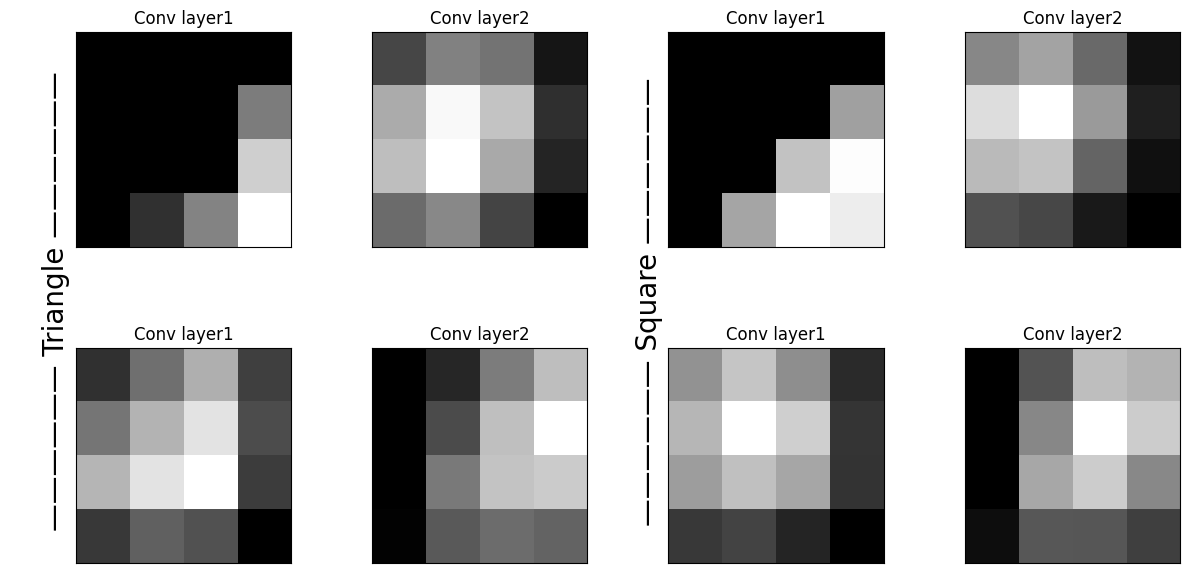

In [ ]:
### START CODE HERE ###
conv1_triangle, conv2_triangle = model.get_features(tensor_triangle_test.unsqueeze(1).float().to(device))
conv1_square, conv2_square = model.get_features(tensor_square_test.unsqueeze(1).float().to(device))

plt.figure(figsize=(12, 6))

feature_maps = [conv1_triangle, conv2_triangle, conv1_square, conv2_square]
titles = ['Conv layer1', 'Conv layer2']

for i, feature_map in enumerate(feature_maps):
    plt.subplot(2, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_map[0, 0].squeeze().cpu().detach().numpy(), cmap='gray')
    if i == 0:
        plt.ylabel('\n—————— Triangle ——————', fontsize=20,y=-0.25)
    elif i == 2:
        plt.ylabel('\n—————— Square ——————', fontsize=20,y=-0.25)
    plt.title(titles[i%2!=0])

    plt.subplot(2, 4, i + 5)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_map[0, 1].squeeze().cpu().detach().numpy(), cmap='gray')
    plt.title(titles[i%2!=0])
plt.tight_layout()
plt.show()
### END CODE HERE ###

predicted_label: [1. 0.]
true_labels: [1 0]


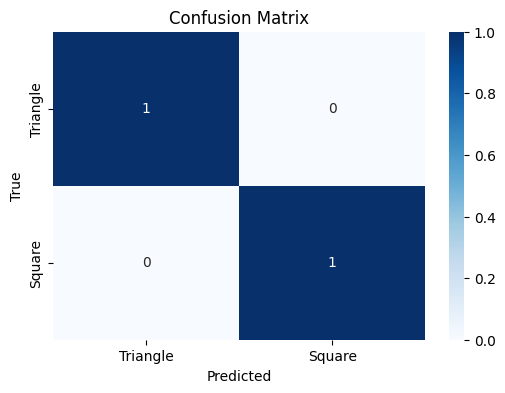

In [ ]:
predictions = model(test_data_tensors.float().to(device))
predicted_labels = (predictions > 0.5).float().cpu().detach().numpy().flatten()
true_labels = test_data_labels.cpu().numpy().flatten()
print('predicted_label:',predicted_labels)
print('true_labels:',true_labels)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Triangle', 'Square'], yticklabels=['Triangle', 'Square'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
